In [4]:
from sklearn.datasets import make_moons

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = make_moons(n_samples= 10000, noise = 0.4)

In [7]:
df = pd.DataFrame(data[0],columns=['X','Y'])

In [8]:
target = pd.DataFrame(data[1],columns=['class'])

In [9]:
final_df = pd.concat([df,target],axis=1)

In [10]:
df_0 = final_df[final_df['class'] == 0].drop(['class'],axis=1)
df_1 = final_df[final_df['class'] == 1].drop(['class'],axis=1)

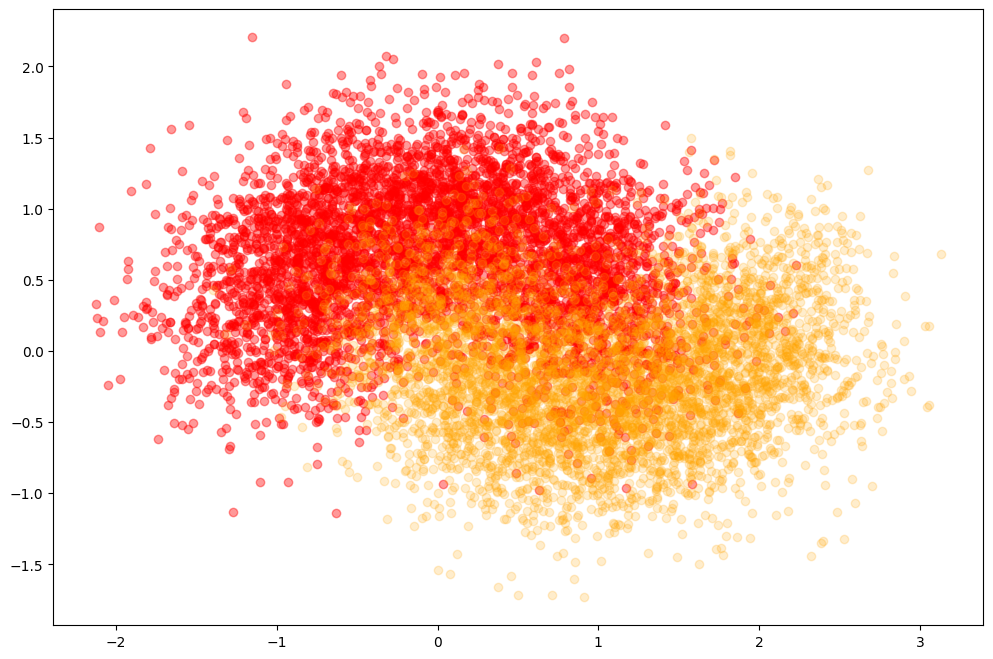

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df_0['X'],df_0['Y'],'o',color='red',alpha=0.4)
plt.plot(df_1['X'],df_1['Y'],'o',color='orange',alpha = 0.2)

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=0.4,random_state=42)

In [14]:
parameters = {
    'max_leaf_nodes' : [3,4,5]
}

In [15]:
gs = GridSearchCV(DecisionTreeClassifier(),parameters,cv=4)

In [16]:
gs.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [3, 4, 5]})

In [17]:
gs.best_params_

{'max_leaf_nodes': 4}

In [18]:
model = DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

In [19]:
model.score(X_test,y_test)

0.84575

In [20]:
from sklearn.model_selection import ShuffleSplit

In [30]:
data_moon,label = data

In [60]:
ss = ShuffleSplit(n_splits=1000,test_size=100,random_state=42)

In [79]:
podzbiory_danych = []
podzbiory_etykiet = []

for i, (train_index, test_index) in enumerate(ss.split(data_moon)):
    podzbior_danych = pd.DataFrame(data_moon[test_index],columns=['X','Y'])  # wybieramy dane z podzbioru
    podzbior_etykiet = label[test_index]  # wybieramy odpowiadające etykiety
    podzbiory_danych.append(podzbior_danych)
    podzbiory_etykiet.append(podzbior_etykiet)

In [83]:
new_model = DecisionTreeClassifier(max_leaf_nodes=4)

In [76]:
podzbiory_danych[0]

,X,Y
0,0.299348,-1.151384
1,1.009918,-0.271312
2,2.111137,-0.123805
3,-1.499590,-0.068756
4,1.223924,-0.017270
...,...,...
95,-0.662409,0.426326
96,-0.614691,0.156299
97,1.494848,-0.741585
98,1.044870,-0.247148


In [107]:
results = []

In [108]:
final_test_data,final_label = make_moons(n_samples= 2000, noise = 0.4)

In [109]:
final_test_data = pd.DataFrame(final_test_data,columns=['X','Y'])

In [110]:
for i in range(len(podzbiory_danych)):
    X = podzbiory_danych[i]
    y = podzbiory_etykiet[i]
    new_model.fit(X,y)
    results.append(new_model.predict(final_test_data))

In [117]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [116]:
final = mode(results)[0]

In [118]:
accuracy_score(final,final_label)

0.8515

In [119]:
model.score(final_test_data,final_label)

0.846